# Discovering Geo-Referenced (Spatial) Periodic Frequent patterns in Big Data Using PFS_ECLAT Algorithm

In this tutorial, we will discuss the first approach to find Geo-Referenced Periodic Frequent patterns in big data using GPFPMiner algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Geo-Referenced Periodic Frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing GPFPMiner on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the GPFPMiner algorithm

In [1]:
from PAMI.geoReferencedPeriodicFrequentPattern.basic import GPFPMiner  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'
neighborFile = 't10_neighbours.txt'
minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 5000
seperator = '\t'       

#### Step 3: Execute the GPFPMiner algorithm

In [3]:
obj = alg.GPFPMiner(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxmunPeriodCount, nFile=neighborFile,sep=seperator)    #initialize
obj.startMine()            #Start the mining process

100 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='periodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
periodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(periodicFrequentPatternsDF)))

Total No of patterns: 789


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 1.5601165294647217


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 222597120
Memory (USS): 184107008


# Advanced Tutorial on Implementing GPFPMiner Algorithm

In this tutorial, we will discuss the second approach to find Spatial Periodic Frequent patterns in big data using GPFPMiner algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Spatial Periodic Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Periodic Frequent Spatial Pattern Growth(GPFPMiner) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the GPFPMiner algorithm and pandas data frame

In [1]:
from PAMI.geoReferencedPeriodicFrequentPattern.basic import GPFPMiner  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [6]:
inputFile = 'temporal_T10I4D100K.csv'
seperator = '\t'
maximumPeriodCount = 5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
neighborFile='t10_neighbours.txt'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFS_ECLAT algorithm

#### Step 3: Execute the GPFPMiner algorithm using a for loop

In [7]:
algorithm = 'GPFPMiner'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.GPFPMiner(inputFile, minSup=minSupCount,maxPer=maximumPeriodCount,nFile=neighborFile, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maximumPeriodCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


100 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
150 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
200 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
250 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm
300 5000
Spatial Periodic Frequent patterns were generated successfully using SpatialEclat algorithm


#### Step 4: Print the result

In [8]:
print(result)

   algorithm  minSup  maxPer  patterns   runtime     memory
0  GPFPMiner     100    5000       789  1.847106  336785408
1  GPFPMiner     150    5000       766  1.584674  336859136
2  GPFPMiner     200    5000       741  1.678147  337055744
3  GPFPMiner     250    5000       717  1.674733  336744448
4  GPFPMiner     300    5000       692  1.422192  337330176


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [9]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

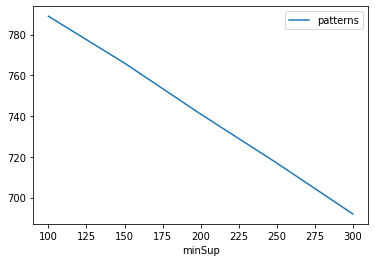

Graph for No Of Patterns is successfully generated!


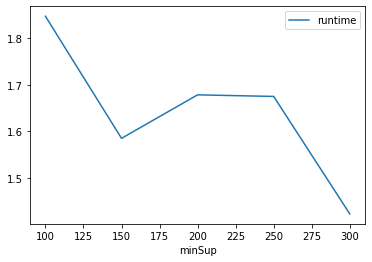

Graph for Runtime taken is successfully generated!


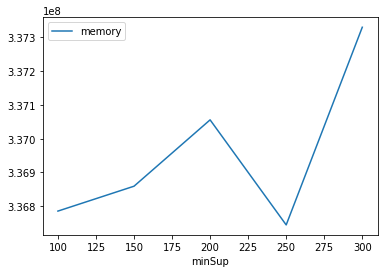

Graph for memory consumption is successfully generated!


In [10]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [11]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
